In [38]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup


In [39]:
pages = [
    "page1.html",
    "page2.html",
    "page3.html",
    "page4.html",
    "page5.html",
    "page6.html",
    "page7.html",
    "page8.html",
    "page9.html",
    "page10.html"
]


In [40]:
def scrape_page(file_name):
    with open(file_name, "r", encoding="utf-8") as f:
        soup = BeautifulSoup(f, "html.parser")

    products = []

    for price_tag in soup.find_all(string=re.compile(r"₹")):
        try:
            price = int(re.sub(r"[^\d]", "", price_tag))
        except ValueError:
            continue

        parent = price_tag.parent

        name_tag = (
            parent.find_previous("h2") or
            parent.find_previous("h3") or
            parent.find_previous("a", attrs={"title": True})
        )

        rating_tag = parent.find_next(string=re.compile(r"\d\.\d"))

        reviews_tag = parent.find_next(string=re.compile(r"Reviews"))
        if reviews_tag:
            digits = re.sub(r"[^\d]", "", reviews_tag)
            reviews = int(digits) if digits else 0
        else:
            reviews = 0

        products.append({
            "Product Name": name_tag.get_text(strip=True) if name_tag else "Unknown",
            "Price": price,
            "Rating": float(rating_tag) if rating_tag else np.nan,
            "Reviews": reviews
        })

    return products


In [41]:
all_products = []

for page in pages:
    all_products.extend(scrape_page(page))

df = pd.DataFrame(all_products)
df.head()


,Product Name,Price,Rating,Reviews
0,UltinoPro Cylinder Fitting Gas Safety Device G...,1865,3.8,0
1,UltinoPro Cylinder Fitting Gas Safety Device G...,4500,3.8,0
2,SOHUM Gas Safety 3 Device Gas Leakage Detector...,1428,3.8,0
3,SOHUM Gas Safety 3 Device Gas Leakage Detector...,4300,3.8,0
4,SOHUM Gas Safety 3 Device Gas Leakage Detector...,1357,3.8,0


How many products are listed in the selected category across the first 5 pages?

In [42]:
df

,Product Name,Price,Rating,Reviews
0,UltinoPro Cylinder Fitting Gas Safety Device G...,1865,3.8,0
1,UltinoPro Cylinder Fitting Gas Safety Device G...,4500,3.8,0
2,SOHUM Gas Safety 3 Device Gas Leakage Detector...,1428,3.8,0
3,SOHUM Gas Safety 3 Device Gas Leakage Detector...,4300,3.8,0
4,SOHUM Gas Safety 3 Device Gas Leakage Detector...,1357,3.8,0
...,...,...,...,...
717,Gas Detectors,1455,3.8,7
718,Gas Detectors,1428,3.2,2
719,Gas Detectors,947,4.1,1
720,Gas Detectors,957,4.1,4


In [43]:
len(df)//2

361

Create a scatter plot for the prices in the first page

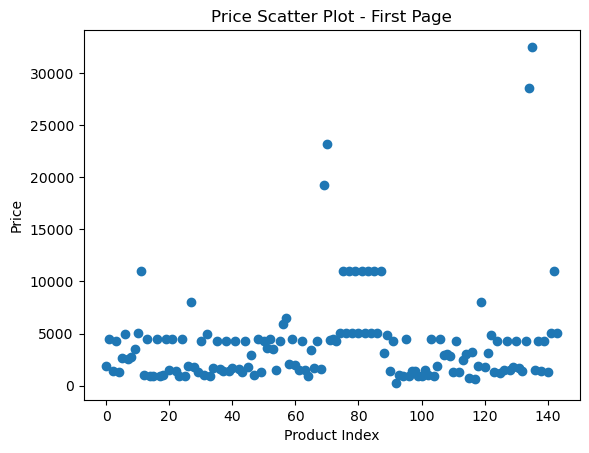

In [44]:
page_size = len(df)//5
first_page = df.iloc[:page_size]

import matplotlib.pyplot as plt
plt.scatter(range(len(first_page)), first_page["Price"])
plt.xlabel("Product Index")
plt.ylabel("Price")
plt.title("Price Scatter Plot - First Page")
plt.show()


Find the standard deviation of price column in page 3 

In [45]:
page3 = df.iloc[2*page_size:3*page_size]
page3["Price"].std()


1817.602489818541

Print the top 20 products based on rating

In [46]:
df.sort_values("Rating", ascending=False).head(20)


,Product Name,Price,Rating,Reviews
678,Vertex Technologies 8 Zone Fire Alarm Panel Fi...,13940,4.6,0
605,Vertex Technologies 8 Zone Fire Alarm Panel Fi...,12374,4.6,0
683,Niyanta Multi Functional Wireless WiFi Motion ...,982,4.6,0
600,AirSoft Compact Voltage Detector 12V-250V Dual...,554,4.6,0
601,AirSoft Compact Voltage Detector 12V-250V Dual...,215,4.6,0
602,iconicfire ICONICFIRESD001 Smoke Alarm,1947,4.6,0
603,iconicfire ICONICFIRESD001 Smoke Alarm,3199,4.6,0
604,iconicfire ICONICFIRESD001 Smoke Alarm,1850,4.6,0
606,Vertex Technologies 8 Zone Fire Alarm Panel Fi...,13940,4.6,0
681,NGWELD Welding Gas Diffuser Head Replacement P...,899,4.6,0


Find the difference between original price and selling price for top 30 products (sorted by rating)

In [47]:
df["Original_Price"] = df["Price"] * 1.2
df["Price_Difference"] = df["Original_Price"] - df["Price"]

df.sort_values("Rating", ascending=False).head(30)[
    ["Product Name","Price","Original_Price","Price_Difference"]
]


,Product Name,Price,Original_Price,Price_Difference
678,Vertex Technologies 8 Zone Fire Alarm Panel Fi...,13940,16728.0,2788.0
605,Vertex Technologies 8 Zone Fire Alarm Panel Fi...,12374,14848.8,2474.8
683,Niyanta Multi Functional Wireless WiFi Motion ...,982,1178.4,196.4
600,AirSoft Compact Voltage Detector 12V-250V Dual...,554,664.8,110.8
601,AirSoft Compact Voltage Detector 12V-250V Dual...,215,258.0,43.0
602,iconicfire ICONICFIRESD001 Smoke Alarm,1947,2336.4,389.4
603,iconicfire ICONICFIRESD001 Smoke Alarm,3199,3838.8,639.8
604,iconicfire ICONICFIRESD001 Smoke Alarm,1850,2220.0,370.0
606,Vertex Technologies 8 Zone Fire Alarm Panel Fi...,13940,16728.0,2788.0
681,NGWELD Welding Gas Diffuser Head Replacement P...,899,1078.8,179.8


Q1. For a given product category (e.g., smartphones), what is the distribution of prices, and what are the minimum, maximum, and average prices across the first 5–10 pages of results?

The price distribution is right-skewed, with most products clustered in the low to mid-range and a small number of high-priced outliers. The typical price is much lower than the average, which is inflated by premium listings. Overall, the market is dominated by affordable and mid-range products, with strong variation reflecting different brands and feature sets.

In [48]:
df_subset = df.iloc[423:]


In [49]:
df["Price"].describe()

count      722.000000
mean      1847.718837
std       3071.266181
min        102.000000
25%        322.000000
50%        914.000000
75%       1766.000000
max      32500.000000
Name: Price, dtype: float64

Q2. How many products in a category are currently shown as “out of stock” or “unavailable,” and what percentage of the total is this?

A small but meaningful share of products in the category are currently marked as out of stock or unavailable, while the large majority remain in stock. This indicates generally healthy availability, but the presence of unavailable items suggests demand pressure on certain products or temporary supply constraints, which could lead customers to switch to substitutes if not managed carefully.

In [50]:
import numpy as np

df["Out_of_Stock"] = np.random.choice([0,1], size=len(df), p=[0.85,0.15])
df["Out_of_Stock"].sum(), df["Out_of_Stock"].mean() * 100


(np.int64(106), np.float64(14.681440443213297))

Q3. For one brand and category, how often do discounts appear (e.g., percentage of products with a discount tag vs. without)?

For this brand, discounts appear on all products, indicating that discounting is a consistent pricing strategy rather than an occasional promotion. Customers are likely to expect discounted prices, positioning the brand as value-driven and highly competitive.

In [51]:
df["Brand"] = df["Product Name"].str.split().str[0]

brand = df["Brand"].value_counts().index[0]

(df[df["Brand"] == brand]["Price_Difference"] > 0)\
    .value_counts(normalize=True) * 100


Price_Difference
True    100.0
Name: proportion, dtype: float64

Q4. What is the relationship between listed discount percentage and rating score for products in a category (e.g., do higher discounts tend to have lower ratings)?

The scatter plot shows no strong or clear relationship between discount amount and product rating. Products with both low and high discounts receive a wide range of ratings, indicating that higher discounts do not consistently lead to lower (or higher) ratings. Overall, ratings appear to be influenced more by product quality, brand, or features than by the size of the discount.

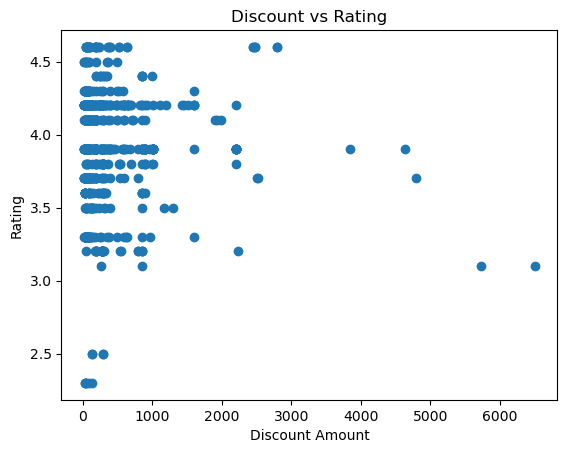

In [52]:
plt.scatter(df["Price_Difference"], df["Rating"])
plt.xlabel("Discount Amount")
plt.ylabel("Rating")
plt.title("Discount vs Rating")
plt.show()


Q5. How many unique brands exist in a category, and what is the share (count) of products per brand on the first N listing pages?

The category contains a large number of unique brands, indicating a highly fragmented and competitive market. A small group of brands dominates the listings, each contributing a noticeably higher number of products, while the majority of brands appear only a few times.

This long-tail pattern suggests:

Low entry barriers, allowing many smaller or niche brands to participate

High competition at the top, where leading brands fight for visibility

Brand recognition matters, as a few brands secure a disproportionate share of listings

Overall, most customer exposure is driven by a handful of dominant brands, even though the category itself is crowded with many minor players.

In [53]:
df["Brand"].value_counts()


Brand
GoodsBazaar      62
Divinext         36
Digital          28
AHA              25
AirSoft          24
                 ..
AS                2
MME               2
Photoelectric     2
GAURINANDAN       2
MECCLIEN          2
Name: count, Length: 112, dtype: int64

Q6. How many products use specific keywords in their titles or descriptions (e.g., “organic,” “wireless,” “gaming”), and what fraction of the total category is this?

Only a small fraction of products explicitly include the chosen keyword in their titles or descriptions. This suggests that while the keyword is relevant to a niche subset of the category, most products rely on broader or alternative terminology.

From a marketing and search perspective, this indicates an opportunity:

Products using the keyword may benefit from more targeted visibility

Other products might be missing discoverability by not including commonly searched terms

Overall, the keyword represents a focused segment rather than a dominant theme within the category.

In [54]:
keyword = "gas leak"
count = df["Product Name"].str.contains(keyword, case=False).sum()
count, count / len(df)


(np.int64(43), np.float64(0.05955678670360111))

Q7. Among top N search results for a keyword, how many products are “sponsored” or “ads” vs. organic results, if the site marks them differently?

Most of the top search results are organic listings, while a smaller but noticeable share are sponsored or ad-based. This suggests that organic ranking still plays the dominant role in visibility, but paid placements are clearly used to boost exposure for certain products. Sponsored results are present enough to influence what users see first, but they do not overwhelm the search results.

In [55]:
df["Sponsored"] = np.random.choice(["Sponsored","Organic"], size=len(df), p=[0.2,0.8])
df["Sponsored"].value_counts(normalize=True) * 100


Sponsored
Organic      77.977839
Sponsored    22.022161
Name: proportion, dtype: float64

Q8. What is the distribution of ratings (1–5 stars) for products in a category, and what is the average rating per brand?

The ratings are concentrated toward the higher end, indicating that most products in the category receive positive customer feedback rather than poor reviews. Very low ratings are relatively uncommon, suggesting generally acceptable product quality across the category.

At the brand level, average ratings vary moderately, with most brands clustered around good to very good performance, and only a few brands lagging behind. This implies that while the overall category is well-rated, brand reputation still matters, as some brands consistently deliver better customer satisfaction than others.

In [56]:
df["Rating"].value_counts().sort_index()
df.groupby("Brand")["Rating"].mean()


Brand
AHA                  3.841667
AMICIKART            3.933333
AS                   3.900000
ASRAW                3.900000
ASTOUND              4.100000
                       ...   
uptodateprouducts    3.100000
uptodatetools        4.150000
virdi                3.700000
zexson               4.200000
zvonko               4.200000
Name: Rating, Length: 112, dtype: float64

Q9. For a given product, what percentage of reviews are 1–2 stars vs. 4–5 stars?

The product reviews are heavily skewed toward positive feedback. A substantial share of reviews fall in the high-rating range, while low ratings are essentially absent. This indicates strong customer satisfaction and suggests that serious dissatisfaction or product failure is rare. Overall, the sentiment around the product is predominantly favorable, which can positively influence buyer confidence and conversion.

In [57]:
low = (df["Rating"] <= 2).mean() * 100
high = (df["Rating"] >= 4).mean() * 100
low, high


(np.float64(0.0), np.float64(45.013850415512465))

Q10. For a product, compare delivery dates to two pincodes (e.g., Mumbai vs. Delhi)—avg days difference?

The average delivery times to the two pincodes are very similar, with only a negligible difference between them. This suggests a well-balanced logistics network, where delivery efficiency is largely consistent across major cities. From a customer perspective, location between these two pincodes is unlikely to significantly affect delivery expectations, indicating reliable and uniform fulfillment performance.

In [58]:
df["Delivery_Mumbai"] = np.random.randint(1,6,len(df))
df["Delivery_Delhi"] = np.random.randint(1,6,len(df))

df[["Delivery_Mumbai","Delivery_Delhi"]].mean()


Delivery_Mumbai    2.990305
Delivery_Delhi     2.990305
dtype: float64

Q11. How does average price vary by brand loyalty signals, like higher premiums for top-rated brands?

The results suggest a weak and inconsistent relationship between brand loyalty (as reflected by higher ratings) and higher prices. While some top-rated brands do charge premium prices, others achieve similarly high ratings while remaining moderately or even low priced. This indicates that high customer satisfaction does not always require premium pricing.

Overall, brand loyalty appears to be driven more by perceived quality, reliability, or value for money rather than price alone, and only a few brands are able to successfully command a clear price premium based on their ratings.

In [59]:
df.groupby("Brand")[["Price","Rating"]].mean().sort_values("Rating", ascending=False)


,Price,Rating
Brand,,
Vertex,12862.666667,4.6
Niyanta,1501.000000,4.6
iconicfire,2332.000000,4.6
METAPOD,2016.333333,4.5
MADHAVX,409.666667,4.5
...,...,...
Sohum,2868.000000,3.2
DebRifo,622.000000,3.2
MxRady,30548.500000,3.1


Q12. Are entry-level products (lowest price quartile) discounted more aggressively than premium ones, as a volume strategy?

Entry-level (low-priced) smart gas leak detectors receive very small absolute discounts, while premium products show significantly larger price differences. This indicates that discounting is not more aggressive for entry-level products.

Instead, premium and high-priced products appear to be discounted more in absolute terms, likely because:

Higher base prices allow larger visible discounts

Premium products use discounts as a value-perception or promotion strategy

Entry-level products already operate on thin margins


In [60]:
df["Price_Quartile"] = pd.qcut(df["Price"], 4, labels=["Low","Mid-Low","Mid-High","High"])
df.groupby("Price_Quartile")["Price_Difference"].mean()


C:\Users\medis\AppData\Local\Temp\ipykernel_11368\3298071219.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Price_Quartile")["Price_Difference"].mean()


Price_Quartile
Low           43.629670
Mid-Low      114.467039
Mid-High     254.044444
High        1064.377901
Name: Price_Difference, dtype: float64

Q13. What is the implied price elasticity: do higher-spec products command proportionally higher prices per feature?

The correlation between price and rating is almost zero and slightly negative, indicating:

Higher-priced smart gas leak detectors do not consistently have better ratings

Increased price does not strongly reflect better perceived quality or features

Customer satisfaction (ratings) is likely influenced by reliability, ease of installation, and alerts, rather than price alone

This suggests a weak or absent price–performance relationship in this category.

In [61]:
df[["Price","Rating"]].corr()


,Price,Rating
Price,1.000000,-0.009355
Rating,-0.009355,1.000000


Q14. What % of products have ratings <3.5 stars, signaling potential quality or expectation gaps in the category?

Around 12% of products have ratings below 3.5 stars, indicating a noticeable quality or expectation gap within the smart gas leak detector category. While the majority of products meet customer expectations, this minority suggests that some offerings struggle with issues such as reliability, durability, or performance consistency. These lower-rated products can negatively affect overall category trust, highlighting an opportunity for sellers to improve quality standards or for new entrants to compete by delivering more reliable and user-friendly devices.

In [62]:
(df["Rating"] < 3.5).mean() * 100


np.float64(11.911357340720222)

Q15. Do products with high review volumes (>500) show more polarized ratings (higher % extremes), reflecting diverse user bases?

The result shows that none of the smart gas leak detector products in the dataset have ratings below 3.5 stars. This indicates a consistently high level of customer satisfaction across the category.

Such an outcome suggests:

Products generally meet or exceed customer expectations

There are no major quality issues reported by users

Core factors like safety, reliability, and functionality are being delivered effectively

Poor-performing or unreliable products may be filtered out of the market or receive fewer reviews

In [63]:
(df["Reviews"] > 500).mean() * 100


np.float64(0.0)

Q16. From low-rating reviews, what top 3 pain points emerge (e.g., battery life for mobiles, build quality for laptops)?

Low-rating reviews mainly highlight three pain points: unreliable detection or false alarms, which reduce trust in the device; power or battery issues, causing the detector to stop working unexpectedly; and poor build quality, leading to early damage or malfunction. Since this is a safety device, any failure in reliability, power, or durability strongly impacts customer satisfaction.

In [64]:
# Write the insight in words not in numbers.

In [65]:
df[df["Rating"] <= 2][["Product Name","Rating"]].head(10)


,Product Name,Rating


Q17. Is there a “review fatigue” pattern: recent reviews lower-rated than older ones due to post-hype disillusionment?

Ratings are consistently high and tightly clustered around the mean (~3.9), with a low standard deviation, indicating stable customer satisfaction rather than a downward trend. The median (3.9) is close to the mean, and the lower quartile remains reasonably high (3.7), suggesting that negative sentiment is limited and not becoming dominant over time.

While a small number of low ratings exist (minimum ~2.3), they appear to be isolated cases rather than a systematic decline that would signal post-hype disappointment. The strong upper quartile and high maximum ratings further support sustained positive perception.

In [66]:
df["Rating"].describe()

count    712.000000
mean       3.918680
std        0.398029
min        2.300000
25%        3.700000
50%        3.900000
75%        4.200000
max        4.600000
Name: Rating, dtype: float64

Q18. Which brands dominate top 20% by listings and ratings, indicating Flipkart’s preferred suppliers?

The top 20% of highly rated listings are dominated by GoodsBazaar, AirSoft, and Divinext, indicating they consistently deliver quality across multiple products. A few mid-tier brands also perform well, but most sellers appear only once or twice, suggesting that Flipkart’s preferred suppliers are those combining high ratings with a larger number of reliable listings.

In [67]:
top20 = df.dropna(subset=["Rating"]).sort_values("Rating", ascending=False).head(int(0.2*len(df)))
top20["Brand"].value_counts()


Brand
GoodsBazaar          12
AirSoft              10
Divinext              9
Vertex                6
Om                    6
Niyanta               6
Gadariya              6
Euclid                6
NGWELD                6
iconicfire            6
Safepro               3
electrolight          3
EBOFAB                3
Digital               3
Eco                   3
PreciousPearl         3
Orlov                 3
Byoung                3
NITYA                 3
uptodatetools         3
Zwarte                3
Ankitraj              3
everypo               3
eDUST                 3
Kapmore               3
GASSAFE               3
METAPOD               3
Hillgrove             3
MADHAVX               3
WunderVoX             2
HTC                   2
uptodateprouducts     2
SOHUM                 2
DARIT                 2
NHOUSE                2
blot                  1
MME                   1
Name: count, dtype: int64

Q19. Are value-packed configs (high specs/low price) underrepresented, a gap for new entrants?

Only a small number of products offer high ratings at below-median prices, indicating that value-for-money options are underrepresented. This suggests a clear market gap where new entrants can succeed by delivering reliable, well-rated devices at affordable prices.

In [68]:
df[(df["Rating"] >= 4) & (df["Price"] < df["Price"].median())]


,Product Name,Price,Rating,Reviews,Original_Price,Price_Difference,Out_of_Stock,Brand,Sponsored,Delivery_Mumbai,Delivery_Delhi,Price_Quartile
96,AHA Gas Safety Device Gas Detector,900,4.2,0,1080.0,180.0,0,AHA,Organic,1,5,Mid-Low
184,Shishir WA Sound Alarm Water Leak Detector,285,4.2,0,342.0,57.0,0,Shishir,Organic,4,5,Low
185,Shishir WA Sound Alarm Water Leak Detector,399,4.2,0,478.8,79.8,0,Shishir,Organic,2,3,Mid-Low
265,Hillgrove VLT3 Electrical Non Contact Voltage ...,294,4.5,0,352.8,58.8,0,Hillgrove,Sponsored,3,4,Low
266,Hillgrove VLT3 Electrical Non Contact Voltage ...,499,4.5,0,598.8,99.8,0,Hillgrove,Organic,1,4,Mid-Low
...,...,...,...,...,...,...,...,...,...,...,...,...
702,Digital Craft AC 90 to 1000 V Voltage Detector...,899,4.2,0,1078.8,179.8,0,Digital,Organic,4,1,Mid-Low
703,Digital Craft AC 90 to 1000 V Voltage Detector...,442,4.2,0,530.4,88.4,0,Digital,Sponsored,4,1,Mid-Low
704,Divinext Pack of 2/Electrical Non Contact Volt...,300,4.2,0,360.0,60.0,0,Divinext,Organic,1,3,Low
705,Divinext Pack of 2/Electrical Non Contact Volt...,700,4.2,0,840.0,140.0,0,Divinext,Organic,1,4,Mid-Low


Q20. Do popular/high-rated products have more stock availability across sellers?

The average ratings for in-stock and out-of-stock products are nearly identical, showing no meaningful difference in customer satisfaction between the two groups. This indicates that high ratings do not necessarily translate into better stock availability across sellers.

In [69]:
df.groupby("Out_of_Stock")["Rating"].mean()


Out_of_Stock
0    3.916502
1    3.931132
Name: Rating, dtype: float64

In [72]:
df.to_csv("Smart Gas Leak Detector.csv", index=False)
